In [1]:
import pandas as pd
import re

# 1. List of mountains

In [370]:
def get_list_of_mountains():
    # for simplicity it was decided avoid casing
    list_of_mountains_raw = pd.read_csv("raw_data/list_of_earth_mountains.csv")["Mountain"].str.lower().unique()
    
    # delete brackets info, 'mount washington (british columbia)' -> 'mount washington'
    list_of_mountains_raw = [re.sub(r"[\(\[].*?[\)\]]", '', name).strip() for name in list_of_mountains_raw]
    
    # It turned out that a lot of mountains have name of format MOUNT %FAMOUS LOCATION% (MOUNT WASHINGTON), while some other names are equally often used 
    # with and without word MOUNT (EVEREST/MOUNT EVETEST). In this task, it was decided manualy define list of names with mandotary word MOUNT to avoid confusing, 
    # while for every other delete this prefix.
    
    # list is incomplete, to define better list probably we can reanalysed gathered data, and define cases when we have confusion of mount name with location/person
    not_to_short = ['mount kenya', 'mount stanley', 'mount sanford', 'mount wood',
     'mount vancouver', 'mount churchill','mount bear', 'mount massive',
     'mount harvard', 'mount lincoln', 'mount blue sky','mount wilsion', 'mount belford',
     'mount princeton','missouri mountain', 'mount columbia', 'missouri mountain','mount lindsey',
     'mount sherman','mount kennedy', 'mount darwin','mount cook', 'mount warren','mount dickerson',
     'mount woodrow wilson','mount cameroon','mount walter','mount julian','mount washington','mount wellington',
     'seward mountain', 'mount marshall', 'allen mountain', 'mount ball', 'mount muir', 'north mountain', 'mount royal',
     'mount daniel', 'boulder mountain', 'mount rose', 'mount hayes', 'cascade mountain', 'mount martin',
    'mount lowe', 'mount morning', 'mount cleveland', 'mount davis', 'mount asgard','mount dick', 'mount whitney', 'mount rogers',
    'mount washington', 'mount washington', 'mount lofty', 'blue mountains']
    
    list_of_mountains_short = [name.replace("mountain","").replace("mount","").strip() if name not in not_to_short else name for name in list_of_mountains_raw]
    
    return list_of_mountains_short

In [371]:
get_list_of_mountains = get_list_of_mountains()

# 2. get data with mountain names

In [387]:
# HELP FUNCTIONS
def find_mount(sentences, short_list_of_mountains=list_of_mountains_short, raw_list_of_mountains=list_of_mountains_raw): 
    """
    check if raw sentece has any name from the list_of_mountains
    if mount name in sentece -> create list [sentence, short_mount_name, raw_mount_name]
    """
    sentences_with_mount = []
    for sentence in sentences:
        # remove all punctuation, brackets, etc
        sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence).strip().lower()
        
        for name_idx in range(len(short_list_of_mountains)):
            mountain = short_list_of_mountains[name_idx]
            
            # some one word names could be part of bigger unrelated words, for example mount Api in Nepal
            # assuming that 2+ words names dont have this problem, we check one word names by spliting sentence,
            # while for 2+ words names just check if sentense include certain name
            if len(mountain.split()) > 1:
                if mountain in sentence:
                    sentences_with_mount.append([sentence, mountain, raw_list_of_mountains[name_idx]])
            else:
                if mountain in sentence.split():
                    sentences_with_mount.append([sentence, mountain, raw_list_of_mountains[name_idx]])
    
    print(f"input numbe of sentences: {len(sentences)}, mount was found in {len(sentences_with_mount)} sentences")
    
    return sentences_with_mount

def read_raw_txt_data(file_path):
    with open(file_path, "r") as f:
        content = f.read().strip()
        sentences = [row for row in content.split("\n") if len(row) > 2]
    return sentences

def specific_symbol_cleaning(sentence):
    symbols_to_replace = [["Ã¼","u"], ["Ã¶", "o"],["â€“","-"],["Ã©","e"], ["Ã³","o"], ["Â°","*"]]
    for symbols in symbols_to_replace:
        sentence = sentence.replace(symbols[0], symbols[1]) 
    return sentence


class GetCleanDataWithMountains:
    def __init__(self):
        self.list_of_climbings_path = "raw_data/list_of_climbings_wikipedia.txt"
        self.hiking_forums_path = "raw_data/hiking_forums.txt"
        self.science_texts_path = "raw_data/science_texts.txt"
        self.chatgpt_1_path = "raw_data/chatgpt_1.txt"
        self.chatgpt_2_path = "raw_data/chatgpt_2.txt"
        
    def get_list_of_climbings_data(self):
        list_of_climbings_sentences = read_raw_txt_data(self.list_of_climbings_path)
        # brackets cleaning
        list_of_climbings_sentences = [re.sub(r"[\[\(].*?[\]\)]", '', sent) for sent in list_of_climbings_sentences]
        # delete year part from  year: sentence formatted rows
        list_of_climbings_sentences = [sent.split(":")[1].strip() if len(sent.split(":")) > 1 else sent for sent in list_of_climbings_sentences]
        # specific symbol cleaning 
        list_of_climbings_sentences = [specific_symbol_cleaning(sent) for sent in list_of_climbings_sentences]
        
        return find_mount(list_of_climbings_sentences)
    
    def get_hiking_forums_data(self):
        hiking_forums_sentences = read_raw_txt_data(self.hiking_forums_path)
        
        return find_mount(hiking_forums_sentences)
    
    def get_science_texts_data(self):
        science_texts_sentences = read_raw_txt_data(self.science_texts_path)
        # brackets cleaning
        science_texts_sentences = [re.sub(r"[\[\(].*?[\]\)]", '', sent) for sent in science_texts_sentences]
        # specific symbol cleaning 
        science_texts_sentences = [specific_symbol_cleaning(sent) for sent in science_texts_sentences]
        
        return find_mount(science_texts_sentences)
    
    def get_chat_gpt_1_data(self):
        chatgpt_1_sentences = read_raw_txt_data(self.chatgpt_1_path)
        # brackets cleaning
        chatgpt_1_sentences = [re.sub(r"[\[\(].*?[\]\)]", '', sent) for sent in chatgpt_1_sentences]
        # delete year part from  year: sentence formatted rows
        chatgpt_1_sentences = [sent.split(":")[1].strip() if len(sent.split(":")) > 1 else sent for sent in chatgpt_1_sentences]
        chatgpt_1_sentences = [specific_symbol_cleaning(sent) for sent in chatgpt_1_sentences]
        # additional cleaning
        chatgpt_1_sentences = [sent.replace("\'s","").replace('"',"") for sent in chatgpt_1_sentences if len(sent) > 1]
        
        return find_mount(chatgpt_1_sentences)
    
    def get_chat_gpt_2_data(self):
        chatgpt_2_sentences = read_raw_txt_data(self.chatgpt_2_path)
        # brackets cleaning
        chatgpt_2_sentences = [re.sub(r"[\[\(].*?[\]\)]", '', sent) for sent in chatgpt_2_sentences]
        # delete year part from  year: sentence formatted rows
        chatgpt_2_sentences = [sent.split(":")[1].strip() if len(sent.split(":")) > 1 else sent for sent in chatgpt_2_sentences]
        chatgpt_2_sentences = [specific_symbol_cleaning(sent) for sent in chatgpt_2_sentences]
        # additional cleaning
        chatgpt_2_sentences = [sent.replace("\'s","").replace('"',"") for sent in chatgpt_2_sentences if len(sent) > 1]
        
        return find_mount(chatgpt_2_sentences)

In [388]:
get_data = GetCleanDataWithMountains()
print("data we have:\n", get_data.__dict__)

list_of_climbings_data = get_data.get_list_of_climbings_data()
hiking_forums_data = get_data.get_hiking_forums_data()
science_texts_data = get_data.get_science_texts_data()
chatgpt_1_data = get_data.get_chat_gpt_1_data()
chatgpt_2_data = get_data.get_chat_gpt_2_data()

data we have:
 {'list_of_climbings_path': 'raw_data/list_of_climbings_wikipedia.txt', 'hiking_forums_path': 'raw_data/hiking_forums.txt', 'science_texts_path': 'raw_data/science_texts.txt', 'chatgpt_1_path': 'raw_data/chatgpt_1.txt', 'chatgpt_2_path': 'raw_data/chatgpt_2.txt'}
input numbe of sentences: 294, mount was found in 38 sentences
input numbe of sentences: 101, mount was found in 85 sentences
input numbe of sentences: 36, mount was found in 19 sentences
input numbe of sentences: 171, mount was found in 131 sentences
input numbe of sentences: 290, mount was found in 230 sentences


# 3. Assamble all data 


In [405]:
sentences_with_mount = list_of_climbings_data + hiking_forums_data + science_texts_data + chatgpt_1_data + chatgpt_2_data
dataset = pd.DataFrame(sentences_with_mount).drop_duplicates()
dataset.columns = ["cleaned_sentence", "mount_short", "mount"]

# unify 2 mountains 'gasherbrum ii' and 'gasherbrum i' without loosing of diversity
# since 'gasherbrum i' in 'gasherbrum ii' = True, it can cause problems
gash_2 = 'gasherbrum ii'
gash_1 = 'gasherbrum i'
gash = 'gasherbrum'

dataset["cleaned_sentence"] = dataset["cleaned_sentence"].str.replace(gash_2, gash)
dataset["cleaned_sentence"] = dataset["cleaned_sentence"].str.replace(gash_1, gash)

dataset["mount_short"] = dataset["mount_short"].str.replace(gash_2, gash)
dataset["mount_short"] = dataset["mount_short"].str.replace(gash_1, gash)

<AxesSubplot:>

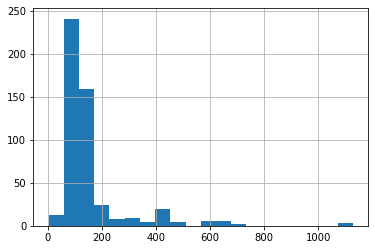

In [406]:
(dataset["cleaned_sentence"].str.len() - dataset["mount_short"].str.len()).hist(bins=20)

<AxesSubplot:>

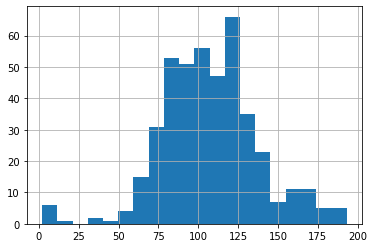

In [407]:
(dataset.loc[dataset["cleaned_sentence"].str.len() < 200]["cleaned_sentence"].str.len() - 
dataset.loc[dataset["cleaned_sentence"].str.len() < 200]["mount_short"].str.len()).hist(bins=20)

In [408]:
dataset = dataset.loc[dataset["cleaned_sentence"].str.len() - dataset["mount_short"].str.len() > 25]

In [409]:
# check for consistency that sentence is each row has related mount_short in it
is_mount = []
not_is_mount = []
for row in dataset.values:
    is_mount.append(row[1] in row[0])
    if not row[1] in row[2]:
        not_is_mount.append(list(row))

print(f"data consisten: {len(is_mount) == sum(is_mount)}, inconsitent data: {not_is_mount}")

data consisten: True, inconsitent data: []


In [410]:
# one sentence can have a few mountain name in it
dataset_grouped = dataset.groupby(["cleaned_sentence"])["mount_short"].apply(list).reset_index(name="mount_list")

# 4. Create Tags

In [411]:
def intermediate_mon_tag(sentence, mount_list): 
    ss = sentence
    for i in range(len(mount_list)):
        sentence = sentence.replace(mount_list[i], f"mount_name_{i}")
        # FIXME
        sentence = sentence.replace("mount_name_0s", "mount_name_0")
    return sentence

In [412]:
def create_tags(sentence, mount_list):
    tags = []
    for word in sentence.split():
        if "mount_name" in word:
            if "i" in word:
                print(word)
            mount_idx = int(word.split("_")[2])
            splited_name = mount_list[mount_idx].split()
            if len(splited_name) > 1: 
                tags.append("B-MON")
                for i_double in range(len(splited_name)-1):
                    tags.append("I-MON")
            else:
                tags.append("I-MON")
        else:
            tags.append("O")
    return tags

In [413]:
tags_col = [create_tags(intermediate_mon_tag(row[0], row[1]),row[1]) for row in dataset_grouped.values]
dataset_grouped["tags"] = tags_col

In [414]:
# Check for data consistency:
# number of words = number of tags
dataset_grouped.loc[dataset_grouped["cleaned_sentence"].apply(lambda x: len(x.split())) != dataset_grouped["tags"].apply(lambda x: len(x))].values

array([], shape=(0, 3), dtype=object)

In [415]:
# check that tags in correct order. There is a possibility that some 2 word tag will be on the place of one word tag -> shifting of all tokens
mount_list_length = dataset_grouped["mount_list"].apply(lambda x: len(x))
dataset_grouped.loc[(dataset_grouped["mount_list"].apply(lambda x: len(' '.join(x).split())) > mount_list_length)
                    & (mount_list_length > 1)].sample(3).values

array([['you transported me back to the time my kids and i drove up mauna kea and brought some snow down the mountain it melted really fast though and i don t think we even got to the saddle road before it disappeared another time i took my girl scout troop to the observatory for a look see it was a fun and educational experience for the girls what is beautiful about visiting the volcano areas of the big island for me is the flora and birds my daughter studied the honeycreeper birds apapane akepa iiwi with a uwhilo professor during her time at the university for me i love the ohia lehua that grows near volcanoes they make such a lovely haku lei',
        list(['mauna kea', 'haku']),
        list(['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MON', 'I-MON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

In [402]:
dataset_grouped.to_csv("clean_data/dataset_mountains.csv", index=False, sep=";")

In [404]:
# save data in format of conll2003 NER Dataset
# https://www.kaggle.com/datasets/juliangarratt/conll2003-dataset
with open("clean_data/dataset_mountains.txt", "a") as f:
    f.write("-DOCSTART- O\n\n")
    for row in dataset_grouped.values:
        for word, tag in zip(row[0].split(), row[2]):
            string_to_write = word + " " + tag + "\n"
            f.write(string_to_write)
        f.write("\n")